In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! pip install sastrawi

In [ ]:
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from functools import reduce
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Preprocessing**

In [ ]:
def parsing(dokumen):
    #memisahkan dokumen
    step_0 = dokumen.split(':')
    #lakukan bagian dari list pertama
    step_1 = step_0[1]
    #memisahkan dokumen dengan tanda ,
    step_2 = step_1.split(',')

    step_3 = [name.strip() for name in step_2]
    #memecahkan struktur dokumen menjadi komponen-komponen terpisah
    dokumen = [name.strip() for name in dokumen.split(':')[1].split(',')]
    return dokumen

def pemotongan(dokumen):
    #menghilangkan angka pada dokumen
    dokumen = ''.join([i for i in dokumen if not i.isdigit()])
    #menghapus tanda baca pada dokumen
    dokumen = re.sub(r'[^\w]|_',' ',dokumen)
    #menghapus karakter aneh misalnya: © atau ∑
    dokumen = unicodedata.normalize('NFKD', dokumen).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return dokumen

def case_folding(dokumen):
    #mengubah tulisan menjadi huruf kecil
    dokumen = dokumen.lower()
    return dokumen

def cleaning(dokumen):
    #menghapus link https atau sebagainya pada dokumen misalnya: https://www.suara.com
    dokumen = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', dokumen)
    return dokumen

def duplikat_kata( dokumen):    
    #menghapus kata yang duplikat
    seen = set()
    return ' '.join( seen.add(i) or i for i in dokumen.split() if i not in seen )

def kata(dokumen):
    dokumen = nltk.word_tokenize(dokumen)
    return dokumen

def stopword(dokumen):
    #kata yang berada pada dokumen akan di filtering sesuai dengan kamus bahasa indonesia
    stop_words = set(stopwords.words('indonesian'))
    #dokumen akan di tokenize dan disimpan pada variabel word_tokens
    word_tokens = word_tokenize(dokumen)
    #memfilter kalimat yang tidak penting akan dibuang sesuai dengan kamus bahasa indonesia
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

def phrase(dokumen):
    #Pada langkah ini saya menerapkan sebuah metode dengan menggunakan join() + split()
    # menginisialisasi K 
    K = 2
    # Extraksi frasa di dalam string
    # Menggunakan join() + split() 
    dokumen = ' '.join(dokumen.split()[K:-(K - 1)]) 
    return dokumen

def stemming(dokumen):
    #membuat stemmer pada dokumen
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(dokumen)


In [ ]:
#memanggil fungsi parsing
def parse(dokumen):
    dokumen = parsing(dokumen)
    return dokumen

In [ ]:
#memanggil beberapa fungsi
def preprocessing(dokumen):
    dokumen = cleaning(dokumen) 
    dokumen = case_folding(dokumen)
    dokumen = pemotongan(dokumen)
    dokumen = stopword(dokumen)
    dokumen = phrase(dokumen)
    dokumen = stemming(dokumen)
    dokumen = duplikat_kata(dokumen)
    dokumen = kata(dokumen)
    
    return dokumen

Untuk Dokumen, saya menggunakan 2 dokumen

Dokumen 1 : Apabila kita jarang mengonsumsi sayuran hijau bisa berakibat tidak baik bagi kesehatan. Pertama, kita rentan terkena penyakit. Kita bisa menderita anemia atau kekurangan darah. Karena kurangnya serat, kita juga mudah mengalami sembelit. Ternyata, jarang mengonsumsi sayuran hijau bisa berbahaya bagi tubuh kita.

Dokumen 2 : Sebelum dikonsumsi, sayuran hijau sebaiknya dimasak terlebih dahulu secara benar. Sayuran yang akan dimasak sebaiknya dicuci dan dipotong-potong menurut selera. Sayuran tersebut  jangan dimasak terlalu lama. Jika dimasak terlalu lama, kandungan zat gizinya akan berkurang. Oleh sebab itu, masaklah sayuran hijau secara benar sebelum dikonsumsi.

In [ ]:
#Mencetak hasil preprocesing dan parsing
dokumen1 = "https://www.dapurimajinasi.com Apabila kita jarang mengonsumsi sayuran hijau bisa berakibat tidak baik bagi kesehatan. Pertama, kita rentan terkena penyakit. Kita bisa menderita anemia atau kekurangan darah. Karena kurangnya serat, kita juga mudah mengalami sembelit. Ternyata, jarang mengonsumsi sayuran hijau bisa berbahaya bagi tubuh kita."
dokumen2 = "https://www.dapurimajinasi.com Sebelum dikonsumsi, sayuran hijau sebaiknya dimasak terlebih dahulu secara benar. Sayuran yang akan dimasak sebaiknya dicuci dan dipotong-potong menurut selera. Sayuran tersebut  jangan dimasak terlalu lama. Jika dimasak terlalu lama, kandungan zat gizinya akan berkurang. Oleh sebab itu, masaklah sayuran hijau secara benar sebelum dikonsumsi."
all_dokumen = "https://www.dapurimajinasi.com Apabila kita jarang mengonsumsi sayuran hijau bisa berakibat tidak baik bagi kesehatan. Pertama, kita rentan terkena penyakit. Kita bisa menderita anemia atau kekurangan darah. Karena kurangnya serat, kita juga mudah mengalami sembelit. Ternyata, jarang mengonsumsi sayuran hijau bisa berbahaya bagi tubuh kita. Sebelum dikonsumsi, sayuran hijau sebaiknya dimasak terlebih dahulu secara benar. Sayuran yang akan dimasak sebaiknya dicuci dan dipotong-potong menurut selera. Sayuran tersebut jangan dimasak terlalu lama. Jika dimasak terlalu lama, kandungan zat gizinya akan berkurang. Oleh sebab itu, masaklah sayuran hijau secara benar sebelum dikonsumsi."
print("Hasil Parsing dokumen1 \n", parse(dokumen1))
print("Hasil Parsing dokumen 2\n", parse(dokumen2))
print("Hasil Parsing All_dokumen\n", parse(all_dokumen))
print("Index Term Dokumen 1 \n", preprocessing(dokumen1))
print("Index Term Dokumen 2 \n", preprocessing(dokumen2))
print("All Index Term In Dokumen \n", preprocessing(all_dokumen))

Hasil Parsing dokumen1 
 ['//www.dapurimajinasi.com Apabila kita jarang mengonsumsi sayuran hijau bisa berakibat tidak baik bagi kesehatan. Pertama', 'kita rentan terkena penyakit. Kita bisa menderita anemia atau kekurangan darah. Karena kurangnya serat', 'kita juga mudah mengalami sembelit. Ternyata', 'jarang mengonsumsi sayuran hijau bisa berbahaya bagi tubuh kita.']
Hasil Parsing dokumen 2
 ['//www.dapurimajinasi.com Sebelum dikonsumsi', 'sayuran hijau sebaiknya dimasak terlebih dahulu secara benar. Sayuran yang akan dimasak sebaiknya dicuci dan dipotong-potong menurut selera. Sayuran tersebut  jangan dimasak terlalu lama. Jika dimasak terlalu lama', 'kandungan zat gizinya akan berkurang. Oleh sebab itu', 'masaklah sayuran hijau secara benar sebelum dikonsumsi.']
Hasil Parsing All_dokumen
 ['//www.dapurimajinasi.com Apabila kita jarang mengonsumsi sayuran hijau bisa berakibat tidak baik bagi kesehatan. Pertama', 'kita rentan terkena penyakit. Kita bisa menderita anemia atau kekurang

Setelah melakukan preprocessing maka kita mendapatkan hasil preporcessing yang akan menjadi index term atau bag of word. Bag of word merupakan sebuah type atau sekumpuluan index term yang tidak memiliki yang tidak duplikat. Istilahnya yaitu Bag Of Word Representasion.

**Bag Of Word Representasion**

**Dokumen 1 :** Apabila kita jarang mengonsumsi sayuran hijau bisa berakibat tidak baik bagi kesehatan. Pertama, kita rentan terkena penyakit. Kita bisa menderita anemia atau kekurangan darah. Karena kurangnya serat, kita juga mudah mengalami sembelit. Ternyata, jarang mengonsumsi sayuran hijau bisa berbahaya bagi tubuh kita.

**Dokumen 2 :** Sebelum dikonsumsi, sayuran hijau sebaiknya dimasak terlebih dahulu secara benar. Sayuran yang akan dimasak sebaiknya dicuci dan dipotong-potong menurut selera. Sayuran tersebut  jangan dimasak terlalu lama. Jika dimasak terlalu lama, kandungan zat gizinya akan berkurang. Oleh sebab itu, masaklah sayuran hijau secara benar sebelum dikonsumsi.


In [ ]:
print("BOW Dokumen 1: \n", preprocessing(dokumen1))
print("BOW Dokumen 2: \n", preprocessing(dokumen2))
print("BOW All Dokumen \n", preprocessing(all_dokumen))

BOW Dokumen 1: 
 ['sayur', 'hijau', 'akibat', 'sehat', 'rentan', 'kena', 'sakit', 'derita', 'anemia', 'kurang', 'darah', 'serat', 'mudah', 'alami', 'sembelit', 'jarang', 'konsumsi', 'bahaya']
BOW Dokumen 2: 
 ['hijau', 'masak', 'sayur', 'cuci', 'potong', 'selera', 'kandung', 'zat', 'gizi', 'kurang']
BOW All Dokumen 
 ['sayur', 'hijau', 'akibat', 'sehat', 'rentan', 'kena', 'sakit', 'derita', 'anemia', 'kurang', 'darah', 'serat', 'mudah', 'alami', 'sembelit', 'jarang', 'konsumsi', 'bahaya', 'tubuh', 'masak', 'cuci', 'potong', 'selera', 'kandung', 'zat', 'gizi']


**Term Frequency**

**Dokumen 1 :** Apabila kita jarang mengonsumsi sayuran hijau bisa berakibat tidak baik bagi kesehatan. Pertama, kita rentan terkena penyakit. Kita bisa menderita anemia atau kekurangan darah. Karena kurangnya serat, kita juga mudah mengalami sembelit. Ternyata, jarang mengonsumsi sayuran hijau bisa berbahaya bagi tubuh kita.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 Dokumen1 Frequency1
    sayur          2
    hijau          2
   akibat          1
    sehat          1
   rentan          1
     kena          1
    sakit          1
   derita          1
   anemia          1
   kurang          2
    darah          1
    serat          1
    mudah          1
    alami          1
 sembelit          1
   jarang          2
 konsumsi          2
   bahaya          1




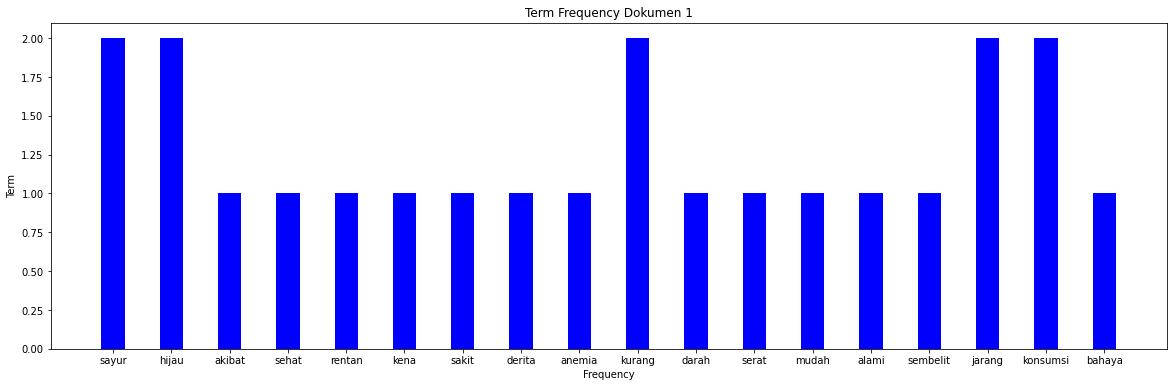

In [ ]:
#deklarasikan kolom dan isinya
frequency = { 'Dokumen1' : ['sayur', 'hijau', 'akibat', 'sehat', 'rentan', 'kena', 'sakit', 'derita', 'anemia', 'kurang', 'darah', 'serat', 'mudah', 'alami', 'sembelit', 'jarang', 'konsumsi', 'bahaya'],
              'Frequency1' : ['2','2','1','1','1','1','1','1','1','2','1','1','1','1','1','2','2','1']
}
#coloum akan tersimpan pada variabel df
df = pd.DataFrame(frequency, columns = ['Dokumen1','Frequency1'])
#mencetak tabel dengan variabel df dan index bernilai False
print (df.to_string(index=False))
print("\n")
#deklarasikan nilai data
data = {'sayur':2, 'hijau':2, 'akibat':1, 'sehat':1, 'rentan':1, 'kena':1, 'sakit':1, 'derita':1, 'anemia':1, 'kurang':2, 'darah':1, 'serat':1, 'mudah':1, 'alami':1, 'sembelit':1, 'jarang':2, 'konsumsi':2, 'bahaya':1} 
Kata = list(data.keys()) 
Banyak = list(data.values()) 
#membuat ukuran lebar dan tinggi plot bar
fig = plt.figure(figsize = (20, 6)) 
  
# membuat plot bar
plt.bar(Kata, Banyak, color ='blue',  width = 0.4) 
plt.xlabel("Frequency") 
plt.ylabel("Term") 
plt.title("Term Frequency Dokumen 1") 
plt.show() 

**Dokumen 2 :** Sebelum dikonsumsi, sayuran hijau sebaiknya dimasak terlebih dahulu secara benar. Sayuran yang akan dimasak sebaiknya dicuci dan dipotong-potong menurut selera. Sayuran tersebut  jangan dimasak terlalu lama. Jika dimasak terlalu lama, kandungan zat gizinya akan berkurang. Oleh sebab itu, masaklah sayuran hijau secara benar sebelum dikonsumsi.

Dokumen2 Frequency2
   hijau          2
   masak          5
   sayur          4
    cuci          1
  potong          2
  selera          1
 kandung          1
     zat          1
    gizi          1
  kurang          1




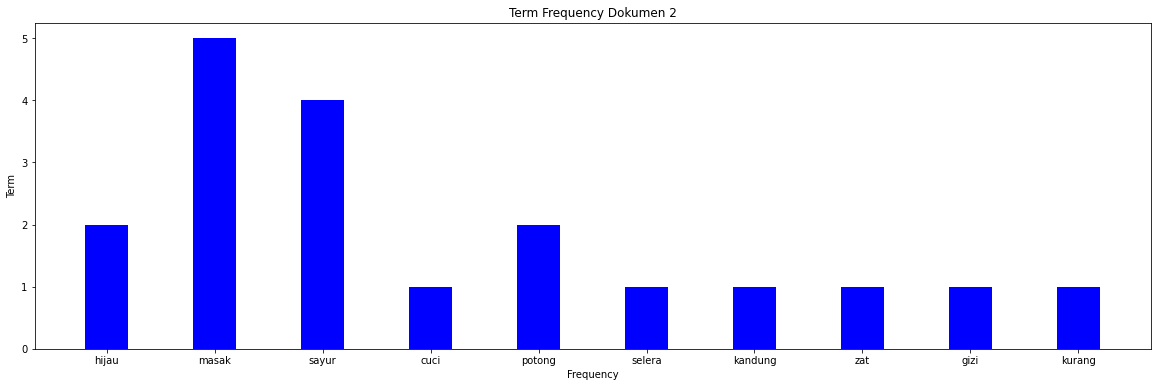

In [ ]:
#deklarasikan kolom dan isinya
frequencyy = {'Dokumen2' : ['hijau', 'masak', 'sayur', 'cuci', 'potong', 'selera', 'kandung', 'zat', 'gizi', 'kurang'],
              'Frequency2' : ['2','5','4','1','2','1','1','1','1','1']
}
#coloum akan tersimpan pada variabel df
df = pd.DataFrame(frequencyy, columns = ['Dokumen2','Frequency2'])
#mencetak tabel dengan variabel df dan index bernilai False
print (df.to_string(index=False))
print("\n")
#deklarasikan nilai data
data = {'hijau':2, 'masak':5, 'sayur':4, 'cuci':1, 'potong':2, 'selera':1, 'kandung':1, 'zat':1, 'gizi':1, 'kurang':1} 
Kataa = list(data.keys()) 
Banyakk = list(data.values()) 
#membuat ukuran lebar dan tinggi plot bar
fig = plt.figure(figsize = (20, 6)) 
  
# membuat plot bar
plt.bar(Kataa, Banyakk, color ='blue',  width = 0.4) 
plt.xlabel("Frequency") 
plt.ylabel("Term") 
plt.title("Term Frequency Dokumen 2") 
plt.show()

**Inverse Document Frequency**

**Dokumen 1 :** Apabila kita jarang mengonsumsi sayuran hijau bisa berakibat tidak baik bagi kesehatan. Pertama, kita rentan terkena penyakit. Kita bisa menderita anemia atau kekurangan darah. Karena kurangnya serat, kita juga mudah mengalami sembelit. Ternyata, jarang mengonsumsi sayuran hijau bisa berbahaya bagi tubuh kita.

**Dokumen 2 :** Sebelum dikonsumsi, sayuran hijau sebaiknya dimasak terlebih dahulu secara benar. Sayuran yang akan dimasak sebaiknya dicuci dan dipotong-potong menurut selera. Sayuran tersebut  jangan dimasak terlalu lama. Jika dimasak terlalu lama, kandungan zat gizinya akan berkurang. Oleh sebab itu, masaklah sayuran hijau secara benar sebelum dikonsumsi.

**Rumus**

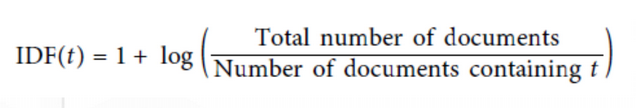

In [ ]:
import math

In [ ]:
#Saya mengikuti sesuai di materi kuliah saya mencoba 1+log(4/3) hasilnya tidak 1,12 maka dari itu
#Saya menggunakan Basis 10 logaritma dari x, (x > 0).
#misalkan kita ingin mencari
#IDF(sayur)
idf_sayur = 1 + math.log10(6.0/2.0)
print("IDF(sayur):",idf_sayur)
#IDF(hijau)
idf_hijau = 1 + math.log10(4.0/2.0)
print("IDF(hijau):",idf_hijau)
#IDF(kurang)
idf_kurang = 1 + math.log10(3.0/2.0)
print("IDF(kurang):",idf_kurang)
#IDF(masak)
idf_masak = 1 + math.log10(5.0/1.0)
print("IDF(masak):",idf_masak)
#IDF(konsumsi)
idf_konsumsi = 1 + math.log10(4.0/2.0)
print("IDF(konsumsi):",idf_konsumsi)

IDF(sayur): 1.4771212547196624
IDF(hijau): 1.3010299956639813
IDF(kurang): 1.1760912590556813
IDF(masak): 1.6989700043360187
IDF(konsumsi): 1.3010299956639813


**TF-IDF**

untuk **Dokumen 1**

In [ ]:
#contoh.
#menghitung tfidf 
#TFIDF sayur pada dokumen 1
tfidf_sayur = 2.0 * 1.47
print("TF-IDF(sayur):",tfidf_sayur)

#TFIDF hijau pada dokumen 1
tfidf_hijau = 2.0 * 1.30
print("TF-IDF(hijau):",tfidf_hijau)

#TFIDF kurang pada dokumen 1
tfidf_kurang = 2.0 * 1.17
print("TF-IDF(kurang):",tfidf_kurang)

#TFIDF masak pada dokumen 1
tfidf_masak = 0.0 * 1.69
print("TF-IDF(masak):",tfidf_masak)

#TFIDF konsumsi pada dokumen 1
tfidf_konsumsi = 2.0 * 1.17
print("TF-IDF(konsumsi):",tfidf_konsumsi)

TF-IDF(sayur): 2.94
TF-IDF(hijau): 2.6
TF-IDF(kurang): 2.34
TF-IDF(masak): 0.0
TF-IDF(konsumsi): 2.34


untuk **Dokumen 2**

In [ ]:
#contoh.
#menghitung tfidf 
#TFIDF sayur pada dokumen 2
tfidf_sayur = 4.0 * 1.47
print("TF-IDF(sayur):",tfidf_sayur)

#TFIDF hijau pada dokumen 2
tfidf_hijau = 2.0 * 1.30
print("TF-IDF(hijau):",tfidf_hijau)

#TFIDF kurang pada dokumen 2
tfidf_kurang = 1.0 * 1.17
print("TF-IDF(kurang):",tfidf_kurang)

#TFIDF masak pada dokumen 2
tfidf_masak = 5.0 * 1.69
print("TF-IDF(masak):",tfidf_masak)

#TFIDF konsumsi pada dokumen 2
tfidf_konsumsi = 2.0 * 1.17
print("TF-IDF(konsumsi):",tfidf_konsumsi)

TF-IDF(sayur): 5.88
TF-IDF(hijau): 2.6
TF-IDF(kurang): 1.17
TF-IDF(masak): 8.45
TF-IDF(konsumsi): 2.34


**TFIDF For All Term In Document**

TFIDF dari BOW

In [ ]:
print("All Index Term In Dokumen: \n", preprocessing(all_dokumen))

All Index Term In Dokumen: 
 ['sayur', 'hijau', 'akibat', 'sehat', 'rentan', 'kena', 'sakit', 'derita', 'anemia', 'kurang', 'darah', 'serat', 'mudah', 'alami', 'sembelit', 'jarang', 'konsumsi', 'bahaya', 'tubuh', 'masak', 'cuci', 'potong', 'selera', 'kandung', 'zat', 'gizi']


In [ ]:
index_term = 'sayur, hijau, akibat ,sehat, rentan, kena, sakit, derita, anemia, kurang, darah, serat, mudah, alami, sembelit, jarang, konsumsi, bahaya, tubuh, masak, cuci, potong, selera, kandung, zat, gizi'
# menggunakan fungsi split
res = len(index_term.split())
print ("Total Index Term In All Document: " + str(res))

Total Index Term In All Document: 26


**Dokumen 1 :** Apabila kita jarang mengonsumsi sayuran hijau bisa berakibat tidak baik bagi kesehatan. Pertama, kita rentan terkena penyakit. Kita bisa menderita anemia atau kekurangan darah. Karena kurangnya serat, kita juga mudah mengalami sembelit. Ternyata, jarang mengonsumsi sayuran hijau bisa berbahaya bagi tubuh kita.

In [ ]:
#menghitung TFIDF untuk all index term pada dokumen 1
#TF-IDF(sayur,d1)
tfidfalld1_sayur = 2.0 * 1.47
print("TF-IDF(sayur,d1):",tfidfalld1_sayur)
#TF-IDF(hijau,d1)
tfidfalld1_hijau = 2.0 * 1.30
print("TF-IDF(hijau,d1):",tfidfalld1_hijau)
#TF-IDF(akibat,d1)
tfidfalld1_akibat = 1.0 * 1.0
print("TF-IDF(akibat,d1):",tfidfalld1_akibat)
#TF-IDF(sehat,d1)
tfidfalld1_sehat = 1.0 * 1.0
print("TF-IDF(sehat,d1):",tfidfalld1_sehat)
#TF-IDF(rentan,d1)
tfidfalld1_rentan = 1.0 * 1.0
print("TF-IDF(rentan,d1):",tfidfalld1_rentan)
#TF-IDF(kena,d1)
tfidfalld1_kena = 1.0 * 1.0
print("TF-IDF(kena,d1):",tfidfalld1_kena)
#TF-IDF(sakit,d1)
tfidfalld1_sakit = 1.0 * 1.0
print("TF-IDF(sakit,d1):",tfidfalld1_sakit)
#TF-IDF(derita,d1)
tfidfalld1_derita = 1.0 * 1.0
print("TF-IDF(derita,d1):",tfidfalld1_derita)
#TF-IDF(anemia,d1)
tfidfalld1_anemia = 1.0 * 1.0
print("TF-IDF(anemia,d1):",tfidfalld1_anemia)
#TF-IDF(kurang,d1)
tfidfalld1_kurang = 2.0 * 1.17
print("TF-IDF(kurang,d1):",tfidfalld1_kurang)
#TF-IDF(darah,d1)
tfidfalld1_darah = 1.0 * 1.0
print("TF-IDF(darah,d1):",tfidfalld1_darah)
#TF-IDF(serat,d1)
tfidfalld1_serat = 1.0 * 1.0
print("TF-IDF(serat,d1):",tfidfalld1_serat)
#TF-IDF(mudah,d1)
tfidfalld1_mudah = 1.0 * 1.0
print("TF-IDF(mudah,d1):",tfidfalld1_mudah)
#TF-IDF(alami,d1)
tfidfalld1_alami = 1.0 * 1.0
print("TF-IDF(alami,d1):",tfidfalld1_alami)
#TF-IDF(sembelit,d1)
tfidfalld1_sembelit = 1.0 * 1.0
print("TF-IDF(sembelit,d1):",tfidfalld1_sembelit)
#TF-IDF(jarang,d1)
tfidfalld1_jarang = 2.0 * 1.30
print("TF-IDF(jarang,d1):",tfidfalld1_jarang)
#TF-IDF(konsumsi,d1)
tfidfalld1_konsumsi = 2.0 * 1.30
print("TF-IDF(konsumsi,d1):",tfidfalld1_konsumsi)
#TF-IDF(bahaya,d1)
tfidfalld1_bahaya = 1.0 * 1.0
print("TF-IDF(bahaya,d1):",tfidfalld1_bahaya)
#TF-IDF(tubuh,d1)
tfidfalld1_tubuh = 1.0 * 1.0
print("TF-IDF(tubuh,d1):",tfidfalld1_tubuh)
#TF-IDF(masak,d1)
tfidfalld1_masak = 0 * 1.69
print("TF-IDF(masak,d1):",tfidfalld1_masak)
#TF-IDF(cuci,d1)
tfidfalld1_cuci = 0 * 1.0
print("TF-IDF(cuci,d1):",tfidfalld1_cuci)
#TF-IDF(potong,d1)
tfidfalld1_potong = 0 * 1.30
print("TF-IDF(potong,d1):",tfidfalld1_potong)
#TF-IDF(selera,d1)
tfidfalld1_selera = 0 * 1.0
print("TF-IDF(selera,d1):",tfidfalld1_selera)
#TF-IDF(kandung,d1)
tfidfalld1_kandung = 0 * 1.0
print("TF-IDF(kandung,d1):",tfidfalld1_kandung)
#TF-IDF(zat,d1)
tfidfalld1_zat = 0 * 1.0
print("TF-IDF(zat,d1):",tfidfalld1_zat)
#TF-IDF(gizi,d1)
tfidfalld1_gizi = 0 * 1.0
print("TF-IDF(gizi,d1):",tfidfalld1_gizi)

TF-IDF(sayur,d1): 2.94
TF-IDF(hijau,d1): 2.6
TF-IDF(akibat,d1): 1.0
TF-IDF(sehat,d1): 1.0
TF-IDF(rentan,d1): 1.0
TF-IDF(kena,d1): 1.0
TF-IDF(sakit,d1): 1.0
TF-IDF(derita,d1): 1.0
TF-IDF(anemia,d1): 1.0
TF-IDF(kurang,d1): 2.34
TF-IDF(darah,d1): 1.0
TF-IDF(serat,d1): 1.0
TF-IDF(mudah,d1): 1.0
TF-IDF(alami,d1): 1.0
TF-IDF(sembelit,d1): 1.0
TF-IDF(jarang,d1): 2.6
TF-IDF(konsumsi,d1): 2.6
TF-IDF(bahaya,d1): 1.0
TF-IDF(tubuh,d1): 1.0
TF-IDF(masak,d1): 0.0
TF-IDF(cuci,d1): 0.0
TF-IDF(potong,d1): 0.0
TF-IDF(selera,d1): 0.0
TF-IDF(kandung,d1): 0.0
TF-IDF(zat,d1): 0.0
TF-IDF(gizi,d1): 0.0


**Dokumen 2** : Sebelum dikonsumsi, sayuran hijau sebaiknya dimasak terlebih dahulu secara benar. Sayuran yang akan dimasak sebaiknya dicuci dan dipotong-potong menurut selera. Sayuran tersebut  jangan dimasak terlalu lama. Jika dimasak terlalu lama, kandungan zat gizinya akan berkurang. Oleh sebab itu, masaklah sayuran hijau secara benar sebelum dikonsumsi.

In [ ]:
#menghitung TFIDF untuk all index term pada dokumen 2
#TF-IDF(sayur,d2)
tfidfalld2_sayur = 4.0 * 1.47
print("TF-IDF(sayur,d2):",tfidfalld2_sayur)
#TF-IDF(hijau,d2)
tfidfalld2_hijau = 2.0 * 1.30
print("TF-IDF(hijau,d2):",tfidfalld2_hijau)
#TF-IDF(akibat,d2)
tfidfalld2_akibat = 0 * 1.0
print("TF-IDF(akibat,d2):",tfidfalld2_akibat)
#TF-IDF(sehat,d2)
tfidfalld2_sehat = 0 * 1.0
print("TF-IDF(sehat,d2):",tfidfalld2_sehat)
#TF-IDF(rentan,d2)
tfidfalld2_rentan = 0 * 1.0 
print("TF-IDF(rentan,d2):",tfidfalld2_rentan)
#TF-IDF(kena,d2)
tfidfalld2_kena = 0 * 1.0
print("TF-IDF(kena,d2):",tfidfalld2_kena)
#TF-IDF(sakit,d2)
tfidfalld2_sakit = 0 * 1.0
print("TF-IDF(sakit,d2):",tfidfalld2_sakit)
#TF-IDF(derita,d2)
tfidfalld2_derita = 0 * 1.0
print("TF-IDF(derita,d2):",tfidfalld2_derita)
#TF-IDF(anemia,d2)
tfidfalld2_anemia = 0 * 1.0
print("TF-IDF(anemia,d2):",tfidfalld2_anemia)
#TF-IDF(kurang,d2)
tfidfalld2_kurang = 1.0 * 1.17
print("TF-IDF(kurang,d2):",tfidfalld2_kurang)
#TF-IDF(darah,d2)
tfidfalld2_darah = 0 * 1.0
print("TF-IDF(darah,d2):",tfidfalld2_darah)
#TF-IDF(serat,d2)
tfidfalld2_serat = 0 * 1.0
print("TF-IDF(serat,d2):",tfidfalld2_serat)
#TF-IDF(mudah,d2)
tfidfalld2_mudah = 0 * 1.0
print("TF-IDF(mudah,d2):",tfidfalld2_mudah)
#TF-IDF(alami,d2)
tfidfalld2_alami = 0 * 1.0
print("TF-IDF(alami,d2):",tfidfalld2_alami)
#TF-IDF(sembelit,d2)
tfidfalld2_sembelit = 0 * 1.0
print("TF-IDF(sembelit,d2):",tfidfalld2_sembelit)
#TF-IDF(jarang,d2)
tfidfalld2_jarang = 0 * 1.30
print("TF-IDF(jarang,d2):",tfidfalld2_jarang)
#TF-IDF(konsumsi,d2)
tfidfalld2_konsumsi = 2.0 * 1.30
print("TF-IDF(konsumsi,d2):",tfidfalld2_konsumsi)
#TF-IDF(bahaya,d2)
tfidfalld2_bahaya = 0 * 1.0
print("TF-IDF(bahaya,d2):",tfidfalld2_bahaya)
#TF-IDF(tubuh,d2)
tfidfalld2_tubuh = 0 * 1.0
print("TF-IDF(tubuh,d2):",tfidfalld2_tubuh)
#TF-IDF(masak,d2)
tfidfalld2_masak = 5.0 * 1.69
print("TF-IDF(masak,d2):",tfidfalld2_masak)
#TF-IDF(cuci,d2)
tfidfalld2_cuci = 1.0 * 1.0
print("TF-IDF(cuci,d2):",tfidfalld2_cuci)
#TF-IDF(potong,d2)
tfidfalld2_potong = 2.0 * 1.30
print("TF-IDF(potong,d2):",tfidfalld2_potong)
#TF-IDF(selera,d1)
tfidfalld2_selera = 1.0 * 1.0
print("TF-IDF(selera,d2):",tfidfalld2_selera)
#TF-IDF(kandung,d2)
tfidfalld2_kandung = 1.0 * 1.0
print("TF-IDF(kandung,d2):",tfidfalld2_kandung)
#TF-IDF(zat,d2)
tfidfalld2_zat = 1.0 * 1.0
print("TF-IDF(zat,d2):",tfidfalld2_zat)
#TF-IDF(gizi,d2)
tfidfalld2_gizi = 1.0 * 1.0
print("TF-IDF(gizi,d2):",tfidfalld2_gizi)

TF-IDF(sayur,d2): 5.88
TF-IDF(hijau,d2): 2.6
TF-IDF(akibat,d2): 0.0
TF-IDF(sehat,d2): 0.0
TF-IDF(rentan,d2): 0.0
TF-IDF(kena,d2): 0.0
TF-IDF(sakit,d2): 0.0
TF-IDF(derita,d2): 0.0
TF-IDF(anemia,d2): 0.0
TF-IDF(kurang,d2): 1.17
TF-IDF(darah,d2): 0.0
TF-IDF(serat,d2): 0.0
TF-IDF(mudah,d2): 0.0
TF-IDF(alami,d2): 0.0
TF-IDF(sembelit,d2): 0.0
TF-IDF(jarang,d2): 0.0
TF-IDF(konsumsi,d2): 2.6
TF-IDF(bahaya,d2): 0.0
TF-IDF(tubuh,d2): 0.0
TF-IDF(masak,d2): 8.45
TF-IDF(cuci,d2): 1.0
TF-IDF(potong,d2): 2.6
TF-IDF(selera,d2): 1.0
TF-IDF(kandung,d2): 1.0
TF-IDF(zat,d2): 1.0
TF-IDF(gizi,d2): 1.0


In [ ]:
#Maka d1 akan direpresentasikan dengan vector
vectord1 = tfidfalld1_sayur, tfidfalld1_hijau, tfidfalld1_akibat, tfidfalld1_sehat, tfidfalld1_rentan, tfidfalld1_kena, tfidfalld1_sakit, tfidfalld1_derita, tfidfalld1_anemia, tfidfalld1_kurang, tfidfalld1_darah, tfidfalld1_serat, tfidfalld1_mudah, tfidfalld1_alami, tfidfalld1_sembelit, tfidfalld1_jarang, tfidfalld1_konsumsi, tfidfalld1_bahaya, tfidfalld1_tubuh, tfidfalld1_masak, tfidfalld1_cuci, tfidfalld1_potong, tfidfalld1_selera, tfidfalld1_kandung, tfidfalld1_zat, tfidfalld1_gizi
print ("Vector d1 : ",vectord1)
#Maka d2 akan direpresentasikan dengan vector
vectord2 = tfidfalld2_sayur, tfidfalld2_hijau, tfidfalld2_akibat, tfidfalld2_sehat, tfidfalld2_rentan, tfidfalld2_kena, tfidfalld2_sakit, tfidfalld2_derita, tfidfalld2_anemia, tfidfalld2_kurang, tfidfalld2_darah, tfidfalld2_serat, tfidfalld2_mudah, tfidfalld2_alami, tfidfalld2_sembelit, tfidfalld2_jarang, tfidfalld2_konsumsi, tfidfalld2_bahaya, tfidfalld2_tubuh, tfidfalld2_masak, tfidfalld2_cuci, tfidfalld2_potong, tfidfalld2_selera, tfidfalld2_kandung, tfidfalld2_zat, tfidfalld2_gizi
print ("Vector d2 : ",vectord2)

Vector d1 :  (2.94, 2.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.34, 1.0, 1.0, 1.0, 1.0, 1.0, 2.6, 2.6, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Vector d2 :  (5.88, 2.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6, 0.0, 0.0, 8.45, 1.0, 2.6, 1.0, 1.0, 1.0, 1.0)


**N-grams**

N-grams dari BOW dokumen 1

In [ ]:
from nltk import ngrams

In [ ]:
#membuat unigrams
dokumen1 = 'sayur hijau akibat sehat rentan kena sakit derita anemia kurang darah serat mudah alami sembelit jarang konsumsi bahaya'
#memisahkan dokumen perkata, jika ingin unigrams maka nilai n =1, jika bigrams nilai n=2, jika trigrams nilai n=3. dan seterusnya
ngram = ngrams(dokumen1.split(' '), n=1)
for x in ngram:
    print(x)

('sayur',)
('hijau',)
('akibat',)
('sehat',)
('rentan',)
('kena',)
('sakit',)
('derita',)
('anemia',)
('kurang',)
('darah',)
('serat',)
('mudah',)
('alami',)
('sembelit',)
('jarang',)
('konsumsi',)
('bahaya',)


In [ ]:
#membuat bigrams
bigrams = ngrams(dokumen1.split(' '), n=2)
for y in bigrams:
    print(y)

('sayur', 'hijau')
('hijau', 'akibat')
('akibat', 'sehat')
('sehat', 'rentan')
('rentan', 'kena')
('kena', 'sakit')
('sakit', 'derita')
('derita', 'anemia')
('anemia', 'kurang')
('kurang', 'darah')
('darah', 'serat')
('serat', 'mudah')
('mudah', 'alami')
('alami', 'sembelit')
('sembelit', 'jarang')
('jarang', 'konsumsi')
('konsumsi', 'bahaya')


In [ ]:
#membuat trigrams
bigrams = ngrams(dokumen1.split(' '), n=3)
for y in bigrams:
    print(y)

('sayur', 'hijau', 'akibat')
('hijau', 'akibat', 'sehat')
('akibat', 'sehat', 'rentan')
('sehat', 'rentan', 'kena')
('rentan', 'kena', 'sakit')
('kena', 'sakit', 'derita')
('sakit', 'derita', 'anemia')
('derita', 'anemia', 'kurang')
('anemia', 'kurang', 'darah')
('kurang', 'darah', 'serat')
('darah', 'serat', 'mudah')
('serat', 'mudah', 'alami')
('mudah', 'alami', 'sembelit')
('alami', 'sembelit', 'jarang')
('sembelit', 'jarang', 'konsumsi')
('jarang', 'konsumsi', 'bahaya')


N-grams dari BOW dokumen 2

In [ ]:
#membuat unigrams
dokumen2 = 'hijau masak sayur cuci potong selera kandung zat gizi kurang'
ngram = ngrams(dokumen1.split(' '), n=1)
for x in ngram:
    print(x)

('sayur',)
('hijau',)
('akibat',)
('sehat',)
('rentan',)
('kena',)
('sakit',)
('derita',)
('anemia',)
('kurang',)
('darah',)
('serat',)
('mudah',)
('alami',)
('sembelit',)
('jarang',)
('konsumsi',)
('bahaya',)


In [ ]:
#membuat bigrams
dokumen2 = 'hijau masak sayur cuci potong selera kandung zat gizi kurang'
ngram = ngrams(dokumen1.split(' '), n=2)
for x in ngram:
    print(x)

('sayur', 'hijau')
('hijau', 'akibat')
('akibat', 'sehat')
('sehat', 'rentan')
('rentan', 'kena')
('kena', 'sakit')
('sakit', 'derita')
('derita', 'anemia')
('anemia', 'kurang')
('kurang', 'darah')
('darah', 'serat')
('serat', 'mudah')
('mudah', 'alami')
('alami', 'sembelit')
('sembelit', 'jarang')
('jarang', 'konsumsi')
('konsumsi', 'bahaya')


In [ ]:
#membuat trigrams
dokumen2 = 'hijau masak sayur cuci potong selera kandung zat gizi kurang'
ngram = ngrams(dokumen1.split(' '), n=3)
for x in ngram:
    print(x)

('sayur', 'hijau', 'akibat')
('hijau', 'akibat', 'sehat')
('akibat', 'sehat', 'rentan')
('sehat', 'rentan', 'kena')
('rentan', 'kena', 'sakit')
('kena', 'sakit', 'derita')
('sakit', 'derita', 'anemia')
('derita', 'anemia', 'kurang')
('anemia', 'kurang', 'darah')
('kurang', 'darah', 'serat')
('darah', 'serat', 'mudah')
('serat', 'mudah', 'alami')
('mudah', 'alami', 'sembelit')
('alami', 'sembelit', 'jarang')
('sembelit', 'jarang', 'konsumsi')
('jarang', 'konsumsi', 'bahaya')


Ngrams dari BOW All Dokumen

In [ ]:
#membuat unigrams
all_dokumen = 'sayur hijau akibat sehat rentan kena sakit derita anemia kurang darah serat mudah alami sembelit jarang konsumsi bahaya tubuh masak cuci potong selera kandung zat gizi'
ngram = ngrams(all_dokumen.split(' '), n=1)
for x in ngram:
    print(x)

('sayur',)
('hijau',)
('akibat',)
('sehat',)
('rentan',)
('kena',)
('sakit',)
('derita',)
('anemia',)
('kurang',)
('darah',)
('serat',)
('mudah',)
('alami',)
('sembelit',)
('jarang',)
('konsumsi',)
('bahaya',)
('tubuh',)
('masak',)
('cuci',)
('potong',)
('selera',)
('kandung',)
('zat',)
('gizi',)


In [ ]:
#membuat bigrams
all_dokumen = 'sayur hijau akibat sehat rentan kena sakit derita anemia kurang darah serat mudah alami sembelit jarang konsumsi bahaya tubuh masak cuci potong selera kandung zat gizi'
ngram = ngrams(all_dokumen.split(' '), n=2)
for x in ngram:
    print(x)

('sayur', 'hijau')
('hijau', 'akibat')
('akibat', 'sehat')
('sehat', 'rentan')
('rentan', 'kena')
('kena', 'sakit')
('sakit', 'derita')
('derita', 'anemia')
('anemia', 'kurang')
('kurang', 'darah')
('darah', 'serat')
('serat', 'mudah')
('mudah', 'alami')
('alami', 'sembelit')
('sembelit', 'jarang')
('jarang', 'konsumsi')
('konsumsi', 'bahaya')
('bahaya', 'tubuh')
('tubuh', 'masak')
('masak', 'cuci')
('cuci', 'potong')
('potong', 'selera')
('selera', 'kandung')
('kandung', 'zat')
('zat', 'gizi')


In [ ]:
#membuat trigrams
all_dokumen = 'sayur hijau akibat sehat rentan kena sakit derita anemia kurang darah serat mudah alami sembelit jarang konsumsi bahaya tubuh masak cuci potong selera kandung zat gizi'
ngram = ngrams(all_dokumen.split(' '), n=3)
for x in ngram:
    print(x)

('sayur', 'hijau', 'akibat')
('hijau', 'akibat', 'sehat')
('akibat', 'sehat', 'rentan')
('sehat', 'rentan', 'kena')
('rentan', 'kena', 'sakit')
('kena', 'sakit', 'derita')
('sakit', 'derita', 'anemia')
('derita', 'anemia', 'kurang')
('anemia', 'kurang', 'darah')
('kurang', 'darah', 'serat')
('darah', 'serat', 'mudah')
('serat', 'mudah', 'alami')
('mudah', 'alami', 'sembelit')
('alami', 'sembelit', 'jarang')
('sembelit', 'jarang', 'konsumsi')
('jarang', 'konsumsi', 'bahaya')
('konsumsi', 'bahaya', 'tubuh')
('bahaya', 'tubuh', 'masak')
('tubuh', 'masak', 'cuci')
('masak', 'cuci', 'potong')
('cuci', 'potong', 'selera')
('potong', 'selera', 'kandung')
('selera', 'kandung', 'zat')
('kandung', 'zat', 'gizi')
